<a href="https://colab.research.google.com/github/BountyHunter1999/Machine-Learning-Zoom-Camp/blob/main/Homeworks/Homework%20%232.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [201]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv

--2021-09-19 15:59:49--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6.8M) [text/plain]
Saving to: ‘AB_NYC_2019.csv.3’

AB_NYC_2019.csv.3   100%[===================>]   6.75M  --.-KB/s    in 0.08s   

2021-09-19 15:59:49 (87.3 MB/s) - ‘AB_NYC_2019.csv.3’ saved [7077973/7077973]



In [202]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [203]:
df = pd.read_csv("AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [204]:
price = df["price"]
price

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64

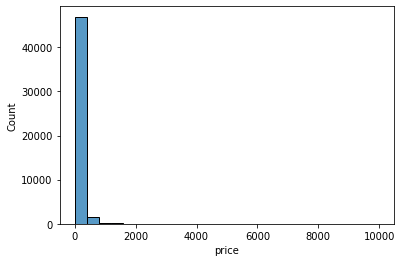

In [205]:
sns.histplot(price, bins=25)

# GETTING ONLY THE REQUIRED FEATURES

In [206]:
df = df[['latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365']]

In [207]:
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


In [208]:
len(df.columns)

8

# Question 1
## Find a feature with missing values. How many missing values does it have?

*   reviews_per_month                 10052




In [209]:
df.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Question 2
## What's the median (50% percentile) for variable 'minimum_nights'?



In [210]:
df['minimum_nights'].describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

Split the data
* Shuffle the initial dataset, use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('price') is not in your dataframe.
* Apply the log transformation to the price variable using the np.log1p() function.


In [211]:
np.random.seed(42)

In [212]:
n = len(df)
n

48895

In [213]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 48892, 48893, 48894])

In [214]:
np.random.shuffle(idx)
idx

array([  879, 44383, 15394, ..., 38158,   860, 15795])

In [215]:
n_train = int(n * 0.6) 
n_val = int(n * 0.2) 
n_test = int(n * 0.2) 

n_train, n_val , n_test

(29337, 9779, 9779)

**Seeing how we can get our shuffled dataset**

In [216]:
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


In [217]:
idx[:n_train][:5]

array([  879, 44383, 15394, 43230, 16332])

In [218]:
df.iloc[:n_train][:5]

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


In [219]:
df.iloc[idx[:n_train]][:5]

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,89,3,62,0.71,1,189
44383,40.70666,-73.90779,30,21,0,NaN,1,73
15394,40.76116,-73.99016,120,2,17,0.43,1,0
43230,40.70763,-74.01050,470,2,5,1.88,327,272
16332,40.79658,-73.93287,199,2,30,0.80,1,30


**Checking the total number of train, val and test dataset**

In [220]:
df_train = df.iloc[idx[:n_train]]
len(df_train)

29337

In [221]:
df_val = df.iloc[idx[n_train:n_train + n_val]]
len(df_val)

9779

In [222]:
df_test = df.iloc[idx[n_train + n_val:]]
len(df_test)

9779

**Our Final Dataset**

In [223]:
df_train[:4]

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,89,3,62,0.71,1,189
44383,40.70666,-73.90779,30,21,0,NaN,1,73
15394,40.76116,-73.99016,120,2,17,0.43,1,0
43230,40.70763,-74.01050,470,2,5,1.88,327,272


In [224]:
df_train = df_train.reset_index(drop=True)
df_train[:4]

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64354,-73.97777,89,3,62,0.71,1,189
1,40.70666,-73.90779,30,21,0,NaN,1,73
2,40.76116,-73.99016,120,2,17,0.43,1,0
3,40.70763,-74.01050,470,2,5,1.88,327,272


In [225]:
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

**Separating our target value from the original dataset**

In [226]:
y_train = np.log1p(df_train.price.values)
y_train[:4]

array([4.49980967, 3.4339872 , 4.79579055, 6.15485809])

In [227]:
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [228]:
del df_train['price']
del df_val['price']
del df_test['price']

**Checking if division of the data is as required**

In [229]:
len(df_test) + len(df_val) + len(df_train) == n

True

In [230]:
df_train.columns

Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [231]:
"price" in df_train.columns

False

Apply the log transformation to the price variable using the `np.log1p() ` function.

In [232]:
np.log(150), np.log1p(149), np.log(150) == np.log1p(149)

(5.0106352940962555, 5.0106352940962555, True)

# Question 3: Finding out the better RMSE 

###  Our Linear Regression Function
- Ones is for the bias term
- `X.T.dot(X)` is a gram matrix with dimension `n+1 X n+1`
- `n+1` because we added the ones 


In [233]:
def train_linear_regression(X, y):
  """
  pass the numpy array of the features(X) and output(y)
  returns bias and weight terms
  """
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X) # Gram matrix
  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0], w_full[1:]

## fill it with 0 or with the mean of this variable
  - train a linear regression model without regularization
  - For computing the mean, using the training only
  

In [234]:
def prepare_X_with_0(df):
  df = df.copy()
  df = df.fillna(0)
  X = df.values
  return X

In [235]:
df_train.isnull().sum(), df.isnull().sum()

(latitude                             0
 longitude                            0
 minimum_nights                       0
 number_of_reviews                    0
 reviews_per_month                 5998
 calculated_host_listings_count       0
 availability_365                     0
 dtype: int64, latitude                              0
 longitude                             0
 price                                 0
 minimum_nights                        0
 number_of_reviews                     0
 reviews_per_month                 10052
 calculated_host_listings_count        0
 availability_365                      0
 dtype: int64)

In [236]:
prepare_X_with_0(df)

array([[ 4.064749e+01, -7.397237e+01,  1.490000e+02, ...,  2.100000e-01,
         6.000000e+00,  3.650000e+02],
       [ 4.075362e+01, -7.398377e+01,  2.250000e+02, ...,  3.800000e-01,
         2.000000e+00,  3.550000e+02],
       [ 4.080902e+01, -7.394190e+01,  1.500000e+02, ...,  0.000000e+00,
         1.000000e+00,  3.650000e+02],
       ...,
       [ 4.081475e+01, -7.394867e+01,  1.150000e+02, ...,  0.000000e+00,
         1.000000e+00,  2.700000e+01],
       [ 4.075751e+01, -7.399112e+01,  5.500000e+01, ...,  0.000000e+00,
         6.000000e+00,  2.000000e+00],
       [ 4.076404e+01, -7.398933e+01,  9.000000e+01, ...,  0.000000e+00,
         1.000000e+00,  2.300000e+01]])

In [237]:
def prepare_X_with_mean(df):
  df = df.copy()
  # For computing the mean, only training is used
  df = df.fillna(df['reviews_per_month'].mean())
  X = df.values
  return X

In [238]:
X_t_0 = prepare_X_with_0(df_train)
w0_0, w_0 = train_linear_regression(X_t_0, y_train)

y_pred_0 = w0_0 + X_t_0.dot(w_0)

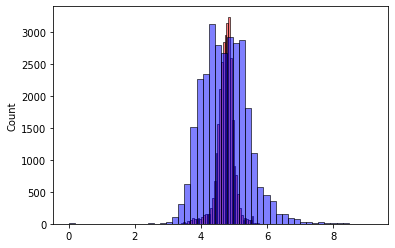

In [239]:
sns.histplot(y_pred_0, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [240]:
X_t_m = prepare_X_with_mean(df_train)
w0_m, w_m = train_linear_regression(X_t_m, y_train)

y_pred_m = w0_m + X_t_m.dot(w_m)

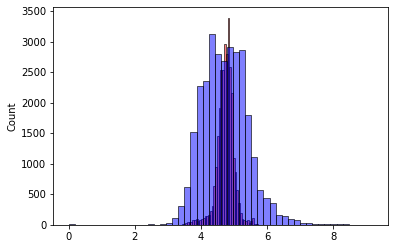

In [241]:
sns.histplot(y_pred_m, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

## Using the validation dataset to evaluate the models 

In [242]:
def rmse(y, y_pred):
  se = (y - y_pred) ** 2
  mse = se.mean()
  return np.sqrt(mse)

## comparing the RMSE of each option.

In [243]:
X_val_0 = prepare_X_with_0(df_val)
y_pred_0 = w0_0 + X_val_0.dot(w_0)
score = rmse(y_val, y_pred_0)
round(score , 4)

0.643

In [244]:
X_val_m = prepare_X_with_mean(df_val)
y_pred_m = w0_m + X_val_m.dot(w_m)
score = rmse(y_val, y_pred_m)
round(score , 4)

0.6428

# Question 4: Which r gives the best RMSE? `r = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`

- Regularization is a technique used for tuning the function by adding an additional penalty term in the error function. The additional term controls the excessively fluctuating function such that the coefficients don't take extreme values.

In [245]:
def train_linear_regression_reg(X, y, r):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX = XTX + r * np.eye(XTX.shape[0])

  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0], w_full[1:]

## Train a regularized linear regression

In [246]:
X_train = prepare_X_with_0(df_train)

In [247]:
scores = dict()
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
  w0, w = train_linear_regression_reg(X_train, y_train, r=r)

  X_val = prepare_X_with_0(df_val)
  y_pred = w0 + X_val.dot(w)
  score = rmse(y_val, y_pred)
  scores[r] = score

In [248]:
scores_df = pd.DataFrame([scores])
scores_df

,0.000000,0.000001,0.000100,0.001000,0.010000,0.100000,1.000000,5.000000,10.000000
0,0.643034,0.643034,0.643072,0.643767,0.655753,0.67733,0.682312,0.682792,0.682843


In [249]:
scores_df.min(axis=1) # checks along each columns in each rows

0    0.643034
dtype: float64

# Question 5: Finding the standard deviation of all the scores by using different seeds
-  See how selecting different seeds affect our score, `seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`
<br>
1. For each seed, do the train/validation/test split with 60%/20%/20% distribution.
2. Fill the missing values with 0 and train a model without regularization.
3. For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
4. What's the standard deviation of all the scores?




In [250]:
n = df.shape[0]
n

48895

In [251]:
n_train, n_val, n_test, n_train+n_val+n_test

(29337, 9779, 9779, 48895)

In [252]:
def split_dataset(df, seed):
  df - df.copy()

  idx = np.arange(df.shape[0])
  np.random.seed(seed)
  np.random.shuffle(idx)

  df_train = df.iloc[idx[:n_train]]
  df_val = df.iloc[idx[n_train: n_train + n_val]]
  df_test = df.iloc[idx[n_train + n_val:]]
  
  y_train = np.log1p(df_train.price.values)
  y_val = np.log1p(df_val.price.values)
  y_test = np.log1p(df_test.price.values)

  del df_train['price']
  del df_val['price']
  del df_test['price']

  features = (df_train,df_val,df_test)
  targets = (y_train, y_val, y_test)

  return features, targets

In [253]:
def q5(df, seeds):
  df =df.copy()
  scores = list()
  for seed_i in seeds:
    features, targets = split_dataset(df, seed_i)

    df_train, df_val, df_test =features
    y_train, y_val, y_test = targets

    X_train = prepare_X_with_0(df_train)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X_with_0(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    scores.append(round(score,4))
  return scores

In [254]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [255]:
scores = q5(df, seeds)
scores = np.array(scores)
round(scores.std(), 3)

0.008

# Question 6: What's the RMSE on the test dataset?
<br>

- Use seed 9
- combine train and validation datasets
- train a model with `r=0.001`
- calculate the RMSE of the test dataset

In [256]:
features, targets = split_dataset(df, 9)

df_train, df_val, df_test =features
y_train, y_val, y_test = targets

In [257]:
(df_train + df_val + df_test).shape[0] == df.shape[0]

True

In [258]:
df_full_train = pd.concat([df_train, df_val])
df_full_train.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
25415,40.70423,-73.91595,1,3,0.13,1,0
1329,40.77115,-73.92275,40,23,0.27,1,207
31738,40.70401,-74.00932,29,0,NaN,96,1
21784,40.74526,-73.97679,30,1,0.04,23,365
38653,40.59349,-73.76377,1,1,0.16,1,90


In [259]:
df_full_train = df_full_train.reset_index(drop=True)
df_full_train.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.70423,-73.91595,1,3,0.13,1,0
1,40.77115,-73.92275,40,23,0.27,1,207
2,40.70401,-74.00932,29,0,NaN,96,1
3,40.74526,-73.97679,30,1,0.04,23,365
4,40.59349,-73.76377,1,1,0.16,1,90


In [260]:
X_full_train = prepare_X_with_0(df_full_train)
X_full_train

array([[ 4.070423e+01, -7.391595e+01,  1.000000e+00, ...,  1.300000e-01,
         1.000000e+00,  0.000000e+00],
       [ 4.077115e+01, -7.392275e+01,  4.000000e+01, ...,  2.700000e-01,
         1.000000e+00,  2.070000e+02],
       [ 4.070401e+01, -7.400932e+01,  2.900000e+01, ...,  0.000000e+00,
         9.600000e+01,  1.000000e+00],
       ...,
       [ 4.072982e+01, -7.398593e+01,  2.000000e+00, ...,  1.100000e-01,
         1.000000e+00,  0.000000e+00],
       [ 4.071969e+01, -7.395620e+01,  1.000000e+00, ...,  2.000000e-02,
         1.000000e+00,  0.000000e+00],
       [ 4.066949e+01, -7.392172e+01,  1.000000e+00, ...,  1.910000e+00,
         2.000000e+00,  3.230000e+02]])

In [261]:
y_full_train = np.concatenate([y_train, y_val])

In [262]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [264]:
X_test = prepare_X_with_0(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
round(score, 2)

0.65